In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow
import keras

In [114]:
df = pd.read_csv('BreastCancerData (4).csv')

In [115]:
df.head()

,Age,BMI,BreastFeeding,Marital Status,Alcohol,Smoking,BreastCancerHistory,Age at firstPeriod,MenstrualCycle,Cancer Positive
0,48,8.543723,1,1,0,0,0,15,1,0
1,31,10.204207,1,1,0,0,0,12,1,0
2,31,13.807133,1,1,0,0,0,14,1,0
3,33,14.088867,1,1,1,0,0,12,1,0
4,49,14.494061,1,1,0,0,0,15,1,0


In [116]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,2388.0,41.029313,7.694522,21.000000,35.000000,41.000000,48.000000,54.0
BMI,2388.0,24.723056,4.939623,8.543723,21.168699,24.453841,27.657793,69.5
BreastFeeding,2388.0,0.891122,0.311551,0.000000,1.000000,1.000000,1.000000,1.0
Marital Status,2388.0,1.126466,0.455754,1.000000,1.000000,1.000000,1.000000,3.0
Alcohol,2388.0,0.351340,0.477489,0.000000,0.000000,0.000000,1.000000,1.0
Smoking,2388.0,0.154941,0.361925,0.000000,0.000000,0.000000,0.000000,1.0
BreastCancerHistory,2388.0,0.029313,0.168718,0.000000,0.000000,0.000000,0.000000,1.0
Age at firstPeriod,2388.0,13.104690,1.684577,8.000000,12.000000,13.000000,14.000000,21.0
MenstrualCycle,2388.0,0.781826,0.413093,0.000000,1.000000,1.000000,1.000000,1.0
Cancer Positive,2388.0,0.404523,0.490902,0.000000,0.000000,0.000000,1.000000,1.0


In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2388 entries, 0 to 2387
Data columns (total 10 columns):
Age                    2388 non-null int64
BMI                    2388 non-null float64
BreastFeeding          2388 non-null int64
Marital Status         2388 non-null int64
Alcohol                2388 non-null int64
Smoking                2388 non-null int64
BreastCancerHistory    2388 non-null int64
Age at firstPeriod     2388 non-null int64
MenstrualCycle         2388 non-null int64
Cancer Positive        2388 non-null int64
dtypes: float64(1), int64(9)
memory usage: 186.7 KB


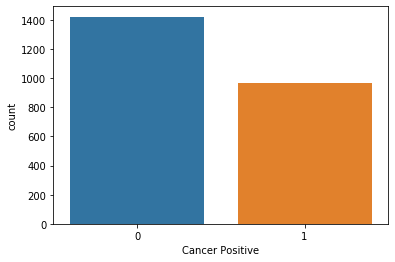

In [118]:
sns.countplot(x='Cancer Positive',data=df)

In [119]:
df.corr()['Cancer Positive'][:-1].sort_values()

MenstrualCycle        -0.527303
Age at firstPeriod    -0.143939
BreastFeeding         -0.125521
Alcohol                0.040402
Smoking                0.047929
BreastCancerHistory    0.145085
Marital Status         0.230007
BMI                    0.360163
Age                    0.387485
Name: Cancer Positive, dtype: float64

In [120]:
X = df.drop('Cancer Positive',axis=1).values
y = df['Cancer Positive'].values

In [121]:
X

array([[48.        ,  8.5437225 ,  1.        , ...,  0.        ,
        15.        ,  1.        ],
       [31.        , 10.20420723,  1.        , ...,  0.        ,
        12.        ,  1.        ],
       [31.        , 13.80713296,  1.        , ...,  0.        ,
        14.        ,  1.        ],
       ...,
       [51.        , 44.17113007,  0.        , ...,  1.        ,
        14.        ,  0.        ],
       [41.        , 57.76097459,  1.        , ...,  0.        ,
        13.        ,  1.        ],
       [35.        , 69.5       ,  1.        , ...,  1.        ,
        15.        ,  1.        ]])

In [122]:
X.shape

(2388, 9)

In [123]:
y

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [124]:
y.shape

(2388,)

In [125]:
from sklearn.model_selection import train_test_split

In [126]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [127]:
from sklearn.preprocessing import MinMaxScaler

In [128]:
scaler = MinMaxScaler()

In [129]:
X_train = scaler.fit_transform(X_train)

In [130]:
X_test = scaler.transform(X_test)

In [131]:
X_train.shape

(1791, 9)

In [132]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [133]:
model = Sequential()

model.add(Dense(9,activation='relu',input_shape=(9, )))
model.add(Dense(9,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam')

In [134]:
model.fit(x=X_train,y=y_train,epochs=1000,validation_data=(X_test,y_test),batch_size=128)

Train on 1791 samples, validate on 597 samples
Epoch 1/1000
1791/1791 [==============================] - 0s 204us/sample - loss: 0.6853 - val_loss: 0.6796
Epoch 2/1000
1791/1791 [==============================] - 0s 14us/sample - loss: 0.6694 - val_loss: 0.6635
Epoch 3/1000
1791/1791 [==============================] - 0s 14us/sample - loss: 0.6553 - val_loss: 0.6501
Epoch 4/1000
1791/1791 [==============================] - 0s 14us/sample - loss: 0.6437 - val_loss: 0.6381
Epoch 5/1000
1791/1791 [==============================] - 0s 14us/sample - loss: 0.6330 - val_loss: 0.6275
Epoch 6/1000
1791/1791 [==============================] - 0s 13us/sample - loss: 0.6238 - val_loss: 0.6170
Epoch 7/1000
1791/1791 [==============================] - 0s 13us/sample - loss: 0.6148 - val_loss: 0.6067
Epoch 8/1000
1791/1791 [==============================] - 0s 13us/sample - loss: 0.6052 - val_loss: 0.5965
Epoch 9/1000
1791/1791 [==============================] - 0s 14us/sample - loss: 0.5959 - val_lo

1791/1791 [==============================] - 0s 14us/sample - loss: 0.3170 - val_loss: 0.3072
Epoch 77/1000
1791/1791 [==============================] - 0s 12us/sample - loss: 0.3152 - val_loss: 0.3086
Epoch 78/1000
1791/1791 [==============================] - 0s 13us/sample - loss: 0.3135 - val_loss: 0.3091
Epoch 79/1000
1791/1791 [==============================] - 0s 12us/sample - loss: 0.3123 - val_loss: 0.3055
Epoch 80/1000
1791/1791 [==============================] - 0s 13us/sample - loss: 0.3112 - val_loss: 0.3059
Epoch 81/1000
1791/1791 [==============================] - 0s 12us/sample - loss: 0.3107 - val_loss: 0.3058
Epoch 82/1000
1791/1791 [==============================] - 0s 12us/sample - loss: 0.3097 - val_loss: 0.3050
Epoch 83/1000
1791/1791 [==============================] - 0s 12us/sample - loss: 0.3089 - val_loss: 0.3025
Epoch 84/1000
1791/1791 [==============================] - 0s 13us/sample - loss: 0.3077 - val_loss: 0.3040
Epoch 85/1000
1791/1791 [=================

1791/1791 [==============================] - 0s 13us/sample - loss: 0.2830 - val_loss: 0.2854
Epoch 152/1000
1791/1791 [==============================] - 0s 13us/sample - loss: 0.2825 - val_loss: 0.2846
Epoch 153/1000
1791/1791 [==============================] - 0s 12us/sample - loss: 0.2836 - val_loss: 0.2856
Epoch 154/1000
1791/1791 [==============================] - 0s 13us/sample - loss: 0.2843 - val_loss: 0.2877
Epoch 155/1000
1791/1791 [==============================] - 0s 12us/sample - loss: 0.2824 - val_loss: 0.2854
Epoch 156/1000
1791/1791 [==============================] - 0s 13us/sample - loss: 0.2807 - val_loss: 0.2845
Epoch 157/1000
1791/1791 [==============================] - 0s 13us/sample - loss: 0.2802 - val_loss: 0.2849
Epoch 158/1000
1791/1791 [==============================] - 0s 13us/sample - loss: 0.2800 - val_loss: 0.2858
Epoch 159/1000
1791/1791 [==============================] - 0s 12us/sample - loss: 0.2798 - val_loss: 0.2852
Epoch 160/1000
1791/1791 [========

1791/1791 [==============================] - 0s 13us/sample - loss: 0.2629 - val_loss: 0.2657
Epoch 227/1000
1791/1791 [==============================] - 0s 13us/sample - loss: 0.2623 - val_loss: 0.2642
Epoch 228/1000
1791/1791 [==============================] - 0s 13us/sample - loss: 0.2633 - val_loss: 0.2657
Epoch 229/1000
1791/1791 [==============================] - 0s 12us/sample - loss: 0.2628 - val_loss: 0.2656
Epoch 230/1000
1791/1791 [==============================] - 0s 13us/sample - loss: 0.2621 - val_loss: 0.2642
Epoch 231/1000
1791/1791 [==============================] - 0s 12us/sample - loss: 0.2602 - val_loss: 0.2647
Epoch 232/1000
1791/1791 [==============================] - 0s 13us/sample - loss: 0.2611 - val_loss: 0.2626
Epoch 233/1000
1791/1791 [==============================] - 0s 12us/sample - loss: 0.2601 - val_loss: 0.2622
Epoch 234/1000
1791/1791 [==============================] - 0s 12us/sample - loss: 0.2602 - val_loss: 0.2613
Epoch 235/1000
1791/1791 [========

1791/1791 [==============================] - 0s 13us/sample - loss: 0.2399 - val_loss: 0.2372
Epoch 302/1000
1791/1791 [==============================] - 0s 13us/sample - loss: 0.2392 - val_loss: 0.2368
Epoch 303/1000
1791/1791 [==============================] - 0s 12us/sample - loss: 0.2389 - val_loss: 0.2373
Epoch 304/1000
1791/1791 [==============================] - 0s 13us/sample - loss: 0.2396 - val_loss: 0.2346
Epoch 305/1000
1791/1791 [==============================] - 0s 13us/sample - loss: 0.2390 - val_loss: 0.2369
Epoch 306/1000
1791/1791 [==============================] - 0s 13us/sample - loss: 0.2383 - val_loss: 0.2366
Epoch 307/1000
1791/1791 [==============================] - 0s 13us/sample - loss: 0.2377 - val_loss: 0.2353
Epoch 308/1000
1791/1791 [==============================] - 0s 13us/sample - loss: 0.2377 - val_loss: 0.2352
Epoch 309/1000
1791/1791 [==============================] - 0s 13us/sample - loss: 0.2380 - val_loss: 0.2335
Epoch 310/1000
1791/1791 [========

1791/1791 [==============================] - 0s 13us/sample - loss: 0.2206 - val_loss: 0.2077
Epoch 377/1000
1791/1791 [==============================] - 0s 14us/sample - loss: 0.2189 - val_loss: 0.2093
Epoch 378/1000
1791/1791 [==============================] - 0s 12us/sample - loss: 0.2190 - val_loss: 0.2071
Epoch 379/1000
1791/1791 [==============================] - 0s 12us/sample - loss: 0.2189 - val_loss: 0.2081
Epoch 380/1000
1791/1791 [==============================] - 0s 12us/sample - loss: 0.2186 - val_loss: 0.2066
Epoch 381/1000
1791/1791 [==============================] - 0s 13us/sample - loss: 0.2180 - val_loss: 0.2080
Epoch 382/1000
1791/1791 [==============================] - 0s 12us/sample - loss: 0.2182 - val_loss: 0.2066
Epoch 383/1000
1791/1791 [==============================] - 0s 13us/sample - loss: 0.2183 - val_loss: 0.2076
Epoch 384/1000
1791/1791 [==============================] - 0s 12us/sample - loss: 0.2180 - val_loss: 0.2075
Epoch 385/1000
1791/1791 [========

1791/1791 [==============================] - 0s 12us/sample - loss: 0.2075 - val_loss: 0.1943
Epoch 452/1000
1791/1791 [==============================] - 0s 13us/sample - loss: 0.2067 - val_loss: 0.1938
Epoch 453/1000
1791/1791 [==============================] - 0s 14us/sample - loss: 0.2080 - val_loss: 0.1933
Epoch 454/1000
1791/1791 [==============================] - 0s 12us/sample - loss: 0.2090 - val_loss: 0.1931
Epoch 455/1000
1791/1791 [==============================] - 0s 12us/sample - loss: 0.2070 - val_loss: 0.1942
Epoch 456/1000
1791/1791 [==============================] - 0s 13us/sample - loss: 0.2073 - val_loss: 0.1958
Epoch 457/1000
1791/1791 [==============================] - 0s 13us/sample - loss: 0.2077 - val_loss: 0.1941
Epoch 458/1000
1791/1791 [==============================] - 0s 13us/sample - loss: 0.2096 - val_loss: 0.1961
Epoch 459/1000
1791/1791 [==============================] - 0s 13us/sample - loss: 0.2065 - val_loss: 0.1927
Epoch 460/1000
1791/1791 [========

1791/1791 [==============================] - 0s 13us/sample - loss: 0.2001 - val_loss: 0.1870
Epoch 527/1000
1791/1791 [==============================] - 0s 13us/sample - loss: 0.2006 - val_loss: 0.1870
Epoch 528/1000
1791/1791 [==============================] - 0s 13us/sample - loss: 0.2000 - val_loss: 0.1877
Epoch 529/1000
1791/1791 [==============================] - 0s 13us/sample - loss: 0.2003 - val_loss: 0.1863
Epoch 530/1000
1791/1791 [==============================] - 0s 12us/sample - loss: 0.1994 - val_loss: 0.1906
Epoch 531/1000
1791/1791 [==============================] - 0s 13us/sample - loss: 0.2013 - val_loss: 0.1865
Epoch 532/1000
1791/1791 [==============================] - 0s 12us/sample - loss: 0.1999 - val_loss: 0.1883
Epoch 533/1000
1791/1791 [==============================] - 0s 12us/sample - loss: 0.2004 - val_loss: 0.1853
Epoch 534/1000
1791/1791 [==============================] - 0s 12us/sample - loss: 0.1995 - val_loss: 0.1888
Epoch 535/1000
1791/1791 [========

1791/1791 [==============================] - 0s 13us/sample - loss: 0.1957 - val_loss: 0.1798
Epoch 602/1000
1791/1791 [==============================] - 0s 13us/sample - loss: 0.1943 - val_loss: 0.1807
Epoch 603/1000
1791/1791 [==============================] - 0s 13us/sample - loss: 0.1939 - val_loss: 0.1810
Epoch 604/1000
1791/1791 [==============================] - 0s 13us/sample - loss: 0.1923 - val_loss: 0.1808
Epoch 605/1000
1791/1791 [==============================] - 0s 12us/sample - loss: 0.1928 - val_loss: 0.1800
Epoch 606/1000
1791/1791 [==============================] - 0s 12us/sample - loss: 0.1929 - val_loss: 0.1794
Epoch 607/1000
1791/1791 [==============================] - 0s 12us/sample - loss: 0.1924 - val_loss: 0.1814
Epoch 608/1000
1791/1791 [==============================] - 0s 12us/sample - loss: 0.1921 - val_loss: 0.1811
Epoch 609/1000
1791/1791 [==============================] - 0s 12us/sample - loss: 0.1928 - val_loss: 0.1790
Epoch 610/1000
1791/1791 [========

1791/1791 [==============================] - 0s 13us/sample - loss: 0.1864 - val_loss: 0.1794
Epoch 677/1000
1791/1791 [==============================] - 0s 17us/sample - loss: 0.1872 - val_loss: 0.1747
Epoch 678/1000
1791/1791 [==============================] - 0s 14us/sample - loss: 0.1864 - val_loss: 0.1769
Epoch 679/1000
1791/1791 [==============================] - 0s 13us/sample - loss: 0.1865 - val_loss: 0.1755
Epoch 680/1000
1791/1791 [==============================] - 0s 13us/sample - loss: 0.1858 - val_loss: 0.1753
Epoch 681/1000
1791/1791 [==============================] - 0s 13us/sample - loss: 0.1861 - val_loss: 0.1760
Epoch 682/1000
1791/1791 [==============================] - 0s 14us/sample - loss: 0.1860 - val_loss: 0.1748
Epoch 683/1000
1791/1791 [==============================] - 0s 13us/sample - loss: 0.1860 - val_loss: 0.1787
Epoch 684/1000
1791/1791 [==============================] - 0s 12us/sample - loss: 0.1865 - val_loss: 0.1770
Epoch 685/1000
1791/1791 [========

1791/1791 [==============================] - 0s 13us/sample - loss: 0.1799 - val_loss: 0.1706
Epoch 752/1000
1791/1791 [==============================] - 0s 13us/sample - loss: 0.1789 - val_loss: 0.1696
Epoch 753/1000
1791/1791 [==============================] - 0s 13us/sample - loss: 0.1794 - val_loss: 0.1684
Epoch 754/1000
1791/1791 [==============================] - 0s 13us/sample - loss: 0.1802 - val_loss: 0.1714
Epoch 755/1000
1791/1791 [==============================] - 0s 12us/sample - loss: 0.1781 - val_loss: 0.1682
Epoch 756/1000
1791/1791 [==============================] - 0s 13us/sample - loss: 0.1784 - val_loss: 0.1697
Epoch 757/1000
1791/1791 [==============================] - 0s 12us/sample - loss: 0.1785 - val_loss: 0.1685
Epoch 758/1000
1791/1791 [==============================] - 0s 13us/sample - loss: 0.1785 - val_loss: 0.1695
Epoch 759/1000
1791/1791 [==============================] - 0s 12us/sample - loss: 0.1776 - val_loss: 0.1675
Epoch 760/1000
1791/1791 [========

1791/1791 [==============================] - 0s 13us/sample - loss: 0.1713 - val_loss: 0.1610
Epoch 827/1000
1791/1791 [==============================] - 0s 13us/sample - loss: 0.1707 - val_loss: 0.1612
Epoch 828/1000
1791/1791 [==============================] - 0s 12us/sample - loss: 0.1702 - val_loss: 0.1624
Epoch 829/1000
1791/1791 [==============================] - 0s 13us/sample - loss: 0.1707 - val_loss: 0.1622
Epoch 830/1000
1791/1791 [==============================] - 0s 13us/sample - loss: 0.1716 - val_loss: 0.1601
Epoch 831/1000
1791/1791 [==============================] - 0s 13us/sample - loss: 0.1708 - val_loss: 0.1609
Epoch 832/1000
1791/1791 [==============================] - 0s 13us/sample - loss: 0.1692 - val_loss: 0.1616
Epoch 833/1000
1791/1791 [==============================] - 0s 13us/sample - loss: 0.1702 - val_loss: 0.1598
Epoch 834/1000
1791/1791 [==============================] - 0s 13us/sample - loss: 0.1715 - val_loss: 0.1639
Epoch 835/1000
1791/1791 [========

1791/1791 [==============================] - 0s 13us/sample - loss: 0.1635 - val_loss: 0.1574
Epoch 902/1000
1791/1791 [==============================] - 0s 13us/sample - loss: 0.1625 - val_loss: 0.1571
Epoch 903/1000
1791/1791 [==============================] - 0s 13us/sample - loss: 0.1630 - val_loss: 0.1563
Epoch 904/1000
1791/1791 [==============================] - 0s 13us/sample - loss: 0.1627 - val_loss: 0.1591
Epoch 905/1000
1791/1791 [==============================] - 0s 13us/sample - loss: 0.1625 - val_loss: 0.1568
Epoch 906/1000
1791/1791 [==============================] - 0s 13us/sample - loss: 0.1622 - val_loss: 0.1577
Epoch 907/1000
1791/1791 [==============================] - 0s 13us/sample - loss: 0.1622 - val_loss: 0.1571
Epoch 908/1000
1791/1791 [==============================] - 0s 12us/sample - loss: 0.1623 - val_loss: 0.1576
Epoch 909/1000
1791/1791 [==============================] - 0s 13us/sample - loss: 0.1623 - val_loss: 0.1577
Epoch 910/1000
1791/1791 [========

1791/1791 [==============================] - 0s 13us/sample - loss: 0.1570 - val_loss: 0.1564
Epoch 977/1000
1791/1791 [==============================] - 0s 13us/sample - loss: 0.1578 - val_loss: 0.1558
Epoch 978/1000
1791/1791 [==============================] - 0s 13us/sample - loss: 0.1563 - val_loss: 0.1571
Epoch 979/1000
1791/1791 [==============================] - 0s 12us/sample - loss: 0.1571 - val_loss: 0.1571
Epoch 980/1000
1791/1791 [==============================] - 0s 13us/sample - loss: 0.1568 - val_loss: 0.1558
Epoch 981/1000
1791/1791 [==============================] - 0s 12us/sample - loss: 0.1577 - val_loss: 0.1552
Epoch 982/1000
1791/1791 [==============================] - 0s 12us/sample - loss: 0.1576 - val_loss: 0.1555
Epoch 983/1000
1791/1791 [==============================] - 0s 12us/sample - loss: 0.1569 - val_loss: 0.1573
Epoch 984/1000
1791/1791 [==============================] - 0s 13us/sample - loss: 0.1563 - val_loss: 0.1551
Epoch 985/1000
1791/1791 [========

In [135]:
losses = pd.DataFrame(model.history.history)

In [136]:
losses

,loss,val_loss
0,0.685315,0.679613
1,0.669409,0.663475
2,0.655284,0.650053
3,0.643712,0.638149
4,0.632999,0.627458
...,...,...
995,0.155239,0.156822
996,0.155896,0.155273
997,0.156120,0.157673
998,0.155611,0.157155


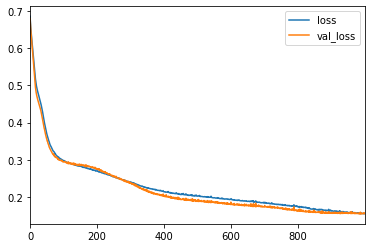

In [137]:
losses.plot()

In [138]:
model = Sequential()

model.add(Dense(9,activation='relu',input_shape=(9, )))
model.add(Dense(9,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam')

In [139]:
from tensorflow.keras.callbacks import EarlyStopping

In [140]:
early_stop = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=25)

In [141]:
model.fit(x=X_train,y=y_train,epochs=1000,validation_data=(X_test,y_test),
         callbacks=[early_stop],batch_size=128)

Train on 1791 samples, validate on 597 samples
Epoch 1/1000
1791/1791 [==============================] - 0s 201us/sample - loss: 0.6661 - val_loss: 0.6647
Epoch 2/1000
1791/1791 [==============================] - 0s 14us/sample - loss: 0.6570 - val_loss: 0.6566
Epoch 3/1000
1791/1791 [==============================] - 0s 13us/sample - loss: 0.6492 - val_loss: 0.6489
Epoch 4/1000
1791/1791 [==============================] - 0s 13us/sample - loss: 0.6421 - val_loss: 0.6418
Epoch 5/1000
1791/1791 [==============================] - 0s 14us/sample - loss: 0.6360 - val_loss: 0.6356
Epoch 6/1000
1791/1791 [==============================] - 0s 14us/sample - loss: 0.6304 - val_loss: 0.6292
Epoch 7/1000
1791/1791 [==============================] - 0s 13us/sample - loss: 0.6243 - val_loss: 0.6220
Epoch 8/1000
1791/1791 [==============================] - 0s 13us/sample - loss: 0.6175 - val_loss: 0.6142
Epoch 9/1000
1791/1791 [==============================] - 0s 13us/sample - loss: 0.6104 - val_lo

1791/1791 [==============================] - 0s 12us/sample - loss: 0.3374 - val_loss: 0.3198
Epoch 77/1000
1791/1791 [==============================] - 0s 13us/sample - loss: 0.3360 - val_loss: 0.3200
Epoch 78/1000
1791/1791 [==============================] - 0s 13us/sample - loss: 0.3350 - val_loss: 0.3161
Epoch 79/1000
1791/1791 [==============================] - 0s 12us/sample - loss: 0.3324 - val_loss: 0.3141
Epoch 80/1000
1791/1791 [==============================] - 0s 12us/sample - loss: 0.3301 - val_loss: 0.3150
Epoch 81/1000
1791/1791 [==============================] - 0s 12us/sample - loss: 0.3290 - val_loss: 0.3126
Epoch 82/1000
1791/1791 [==============================] - 0s 12us/sample - loss: 0.3300 - val_loss: 0.3134
Epoch 83/1000
1791/1791 [==============================] - 0s 12us/sample - loss: 0.3273 - val_loss: 0.3069
Epoch 84/1000
1791/1791 [==============================] - 0s 12us/sample - loss: 0.3244 - val_loss: 0.3088
Epoch 85/1000
1791/1791 [=================

1791/1791 [==============================] - 0s 14us/sample - loss: 0.2695 - val_loss: 0.2561
Epoch 152/1000
1791/1791 [==============================] - 0s 13us/sample - loss: 0.2694 - val_loss: 0.2553
Epoch 153/1000
1791/1791 [==============================] - 0s 13us/sample - loss: 0.2691 - val_loss: 0.2550
Epoch 154/1000
1791/1791 [==============================] - 0s 13us/sample - loss: 0.2689 - val_loss: 0.2536
Epoch 155/1000
1791/1791 [==============================] - 0s 12us/sample - loss: 0.2681 - val_loss: 0.2545
Epoch 156/1000
1791/1791 [==============================] - 0s 12us/sample - loss: 0.2674 - val_loss: 0.2535
Epoch 157/1000
1791/1791 [==============================] - 0s 12us/sample - loss: 0.2669 - val_loss: 0.2530
Epoch 158/1000
1791/1791 [==============================] - 0s 13us/sample - loss: 0.2670 - val_loss: 0.2551
Epoch 159/1000
1791/1791 [==============================] - 0s 13us/sample - loss: 0.2662 - val_loss: 0.2502
Epoch 160/1000
1791/1791 [========

1791/1791 [==============================] - 0s 12us/sample - loss: 0.2424 - val_loss: 0.2256
Epoch 227/1000
1791/1791 [==============================] - 0s 13us/sample - loss: 0.2426 - val_loss: 0.2235
Epoch 228/1000
1791/1791 [==============================] - 0s 12us/sample - loss: 0.2417 - val_loss: 0.2259
Epoch 229/1000
1791/1791 [==============================] - 0s 13us/sample - loss: 0.2413 - val_loss: 0.2232
Epoch 230/1000
1791/1791 [==============================] - 0s 12us/sample - loss: 0.2412 - val_loss: 0.2271
Epoch 231/1000
1791/1791 [==============================] - 0s 12us/sample - loss: 0.2408 - val_loss: 0.2228
Epoch 232/1000
1791/1791 [==============================] - 0s 12us/sample - loss: 0.2405 - val_loss: 0.2230
Epoch 233/1000
1791/1791 [==============================] - 0s 13us/sample - loss: 0.2403 - val_loss: 0.2224
Epoch 234/1000
1791/1791 [==============================] - 0s 13us/sample - loss: 0.2400 - val_loss: 0.2243
Epoch 235/1000
1791/1791 [========

1791/1791 [==============================] - 0s 13us/sample - loss: 0.2243 - val_loss: 0.2113
Epoch 302/1000
1791/1791 [==============================] - 0s 13us/sample - loss: 0.2241 - val_loss: 0.2097
Epoch 303/1000
1791/1791 [==============================] - 0s 13us/sample - loss: 0.2247 - val_loss: 0.2086
Epoch 304/1000
1791/1791 [==============================] - 0s 12us/sample - loss: 0.2236 - val_loss: 0.2120
Epoch 305/1000
1791/1791 [==============================] - 0s 13us/sample - loss: 0.2237 - val_loss: 0.2098
Epoch 306/1000
1791/1791 [==============================] - 0s 13us/sample - loss: 0.2233 - val_loss: 0.2097
Epoch 307/1000
1791/1791 [==============================] - 0s 12us/sample - loss: 0.2236 - val_loss: 0.2097
Epoch 308/1000
1791/1791 [==============================] - 0s 13us/sample - loss: 0.2230 - val_loss: 0.2093
Epoch 309/1000
1791/1791 [==============================] - 0s 13us/sample - loss: 0.2236 - val_loss: 0.2116
Epoch 310/1000
1791/1791 [========

1791/1791 [==============================] - 0s 12us/sample - loss: 0.2120 - val_loss: 0.2006
Epoch 377/1000
1791/1791 [==============================] - 0s 13us/sample - loss: 0.2141 - val_loss: 0.1984
Epoch 378/1000
1791/1791 [==============================] - 0s 13us/sample - loss: 0.2124 - val_loss: 0.2026
Epoch 379/1000
1791/1791 [==============================] - 0s 13us/sample - loss: 0.2133 - val_loss: 0.1986
Epoch 380/1000
1791/1791 [==============================] - 0s 12us/sample - loss: 0.2118 - val_loss: 0.1994
Epoch 381/1000
1791/1791 [==============================] - 0s 14us/sample - loss: 0.2123 - val_loss: 0.1988
Epoch 382/1000
1791/1791 [==============================] - 0s 13us/sample - loss: 0.2123 - val_loss: 0.1988
Epoch 383/1000
1791/1791 [==============================] - 0s 12us/sample - loss: 0.2124 - val_loss: 0.1988
Epoch 384/1000
1791/1791 [==============================] - 0s 15us/sample - loss: 0.2127 - val_loss: 0.1980
Epoch 385/1000
1791/1791 [========

1791/1791 [==============================] - 0s 14us/sample - loss: 0.2040 - val_loss: 0.1927
Epoch 452/1000
1791/1791 [==============================] - 0s 13us/sample - loss: 0.2039 - val_loss: 0.1933
Epoch 453/1000
1791/1791 [==============================] - 0s 13us/sample - loss: 0.2037 - val_loss: 0.1924
Epoch 454/1000
1791/1791 [==============================] - 0s 13us/sample - loss: 0.2035 - val_loss: 0.1925
Epoch 455/1000
1791/1791 [==============================] - 0s 12us/sample - loss: 0.2038 - val_loss: 0.1918
Epoch 456/1000
1791/1791 [==============================] - 0s 13us/sample - loss: 0.2041 - val_loss: 0.1933
Epoch 457/1000
1791/1791 [==============================] - 0s 12us/sample - loss: 0.2039 - val_loss: 0.1918
Epoch 458/1000
1791/1791 [==============================] - 0s 12us/sample - loss: 0.2036 - val_loss: 0.1927
Epoch 459/1000
1791/1791 [==============================] - 0s 12us/sample - loss: 0.2040 - val_loss: 0.1903
Epoch 460/1000
1791/1791 [========

1791/1791 [==============================] - 0s 13us/sample - loss: 0.1970 - val_loss: 0.1870
Epoch 527/1000
1791/1791 [==============================] - 0s 13us/sample - loss: 0.1968 - val_loss: 0.1860
Epoch 528/1000
1791/1791 [==============================] - 0s 13us/sample - loss: 0.1970 - val_loss: 0.1876
Epoch 529/1000
1791/1791 [==============================] - 0s 12us/sample - loss: 0.1970 - val_loss: 0.1877
Epoch 530/1000
1791/1791 [==============================] - 0s 13us/sample - loss: 0.1965 - val_loss: 0.1871
Epoch 531/1000
1791/1791 [==============================] - 0s 13us/sample - loss: 0.1968 - val_loss: 0.1858
Epoch 532/1000
1791/1791 [==============================] - 0s 13us/sample - loss: 0.1966 - val_loss: 0.1863
Epoch 533/1000
1791/1791 [==============================] - 0s 12us/sample - loss: 0.1966 - val_loss: 0.1860
Epoch 534/1000
1791/1791 [==============================] - 0s 12us/sample - loss: 0.1973 - val_loss: 0.1863
Epoch 535/1000
1791/1791 [========

1791/1791 [==============================] - 0s 14us/sample - loss: 0.1899 - val_loss: 0.1813
Epoch 602/1000
1791/1791 [==============================] - 0s 13us/sample - loss: 0.1900 - val_loss: 0.1817
Epoch 603/1000
1791/1791 [==============================] - 0s 13us/sample - loss: 0.1901 - val_loss: 0.1812
Epoch 604/1000
1791/1791 [==============================] - 0s 14us/sample - loss: 0.1896 - val_loss: 0.1817
Epoch 605/1000
1791/1791 [==============================] - 0s 13us/sample - loss: 0.1896 - val_loss: 0.1826
Epoch 606/1000
1791/1791 [==============================] - 0s 14us/sample - loss: 0.1902 - val_loss: 0.1829
Epoch 607/1000
1791/1791 [==============================] - 0s 13us/sample - loss: 0.1900 - val_loss: 0.1819
Epoch 608/1000
1791/1791 [==============================] - 0s 14us/sample - loss: 0.1896 - val_loss: 0.1808
Epoch 609/1000
1791/1791 [==============================] - 0s 13us/sample - loss: 0.1904 - val_loss: 0.1806
Epoch 610/1000
1791/1791 [========

1791/1791 [==============================] - 0s 13us/sample - loss: 0.1851 - val_loss: 0.1758
Epoch 677/1000
1791/1791 [==============================] - 0s 14us/sample - loss: 0.1843 - val_loss: 0.1782
Epoch 678/1000
1791/1791 [==============================] - 0s 13us/sample - loss: 0.1836 - val_loss: 0.1758
Epoch 679/1000
1791/1791 [==============================] - 0s 13us/sample - loss: 0.1841 - val_loss: 0.1761
Epoch 680/1000
1791/1791 [==============================] - 0s 12us/sample - loss: 0.1839 - val_loss: 0.1755
Epoch 681/1000
1791/1791 [==============================] - 0s 13us/sample - loss: 0.1841 - val_loss: 0.1786
Epoch 682/1000
1791/1791 [==============================] - 0s 13us/sample - loss: 0.1840 - val_loss: 0.1769
Epoch 683/1000
1791/1791 [==============================] - 0s 14us/sample - loss: 0.1837 - val_loss: 0.1750
Epoch 684/1000
1791/1791 [==============================] - 0s 13us/sample - loss: 0.1842 - val_loss: 0.1760
Epoch 685/1000
1791/1791 [========

1791/1791 [==============================] - 0s 13us/sample - loss: 0.1789 - val_loss: 0.1732
Epoch 752/1000
1791/1791 [==============================] - 0s 13us/sample - loss: 0.1796 - val_loss: 0.1747
Epoch 753/1000
1791/1791 [==============================] - 0s 13us/sample - loss: 0.1784 - val_loss: 0.1723
Epoch 754/1000
1791/1791 [==============================] - 0s 12us/sample - loss: 0.1794 - val_loss: 0.1735
Epoch 755/1000
1791/1791 [==============================] - 0s 12us/sample - loss: 0.1794 - val_loss: 0.1742
Epoch 756/1000
1791/1791 [==============================] - 0s 13us/sample - loss: 0.1784 - val_loss: 0.1722
Epoch 757/1000
1791/1791 [==============================] - 0s 13us/sample - loss: 0.1798 - val_loss: 0.1733
Epoch 758/1000
1791/1791 [==============================] - 0s 12us/sample - loss: 0.1784 - val_loss: 0.1738
Epoch 759/1000
1791/1791 [==============================] - 0s 13us/sample - loss: 0.1783 - val_loss: 0.1728
Epoch 760/1000
1791/1791 [========

1791/1791 [==============================] - 0s 13us/sample - loss: 0.1749 - val_loss: 0.1697
Epoch 827/1000
1791/1791 [==============================] - 0s 13us/sample - loss: 0.1754 - val_loss: 0.1689
Epoch 828/1000
1791/1791 [==============================] - 0s 13us/sample - loss: 0.1743 - val_loss: 0.1704
Epoch 829/1000
1791/1791 [==============================] - 0s 14us/sample - loss: 0.1737 - val_loss: 0.1692
Epoch 830/1000
1791/1791 [==============================] - 0s 12us/sample - loss: 0.1736 - val_loss: 0.1704
Epoch 831/1000
1791/1791 [==============================] - 0s 12us/sample - loss: 0.1739 - val_loss: 0.1711
Epoch 832/1000
1791/1791 [==============================] - 0s 13us/sample - loss: 0.1749 - val_loss: 0.1695
Epoch 833/1000
1791/1791 [==============================] - 0s 13us/sample - loss: 0.1752 - val_loss: 0.1687
Epoch 834/1000
1791/1791 [==============================] - 0s 13us/sample - loss: 0.1736 - val_loss: 0.1701
Epoch 835/1000
1791/1791 [========

1791/1791 [==============================] - 0s 13us/sample - loss: 0.1704 - val_loss: 0.1686
Epoch 902/1000
1791/1791 [==============================] - 0s 13us/sample - loss: 0.1715 - val_loss: 0.1679
Epoch 903/1000
1791/1791 [==============================] - 0s 12us/sample - loss: 0.1704 - val_loss: 0.1680
Epoch 904/1000
1791/1791 [==============================] - 0s 13us/sample - loss: 0.1693 - val_loss: 0.1677
Epoch 905/1000
1791/1791 [==============================] - 0s 14us/sample - loss: 0.1700 - val_loss: 0.1685
Epoch 906/1000
1791/1791 [==============================] - 0s 13us/sample - loss: 0.1700 - val_loss: 0.1674
Epoch 907/1000
1791/1791 [==============================] - 0s 13us/sample - loss: 0.1696 - val_loss: 0.1694
Epoch 908/1000
1791/1791 [==============================] - 0s 13us/sample - loss: 0.1700 - val_loss: 0.1676
Epoch 909/1000
1791/1791 [==============================] - 0s 14us/sample - loss: 0.1697 - val_loss: 0.1694
Epoch 910/1000
1791/1791 [========

1791/1791 [==============================] - 0s 17us/sample - loss: 0.1664 - val_loss: 0.1664
Epoch 977/1000
1791/1791 [==============================] - 0s 14us/sample - loss: 0.1665 - val_loss: 0.1682
Epoch 978/1000
1791/1791 [==============================] - 0s 14us/sample - loss: 0.1674 - val_loss: 0.1666
Epoch 979/1000
1791/1791 [==============================] - 0s 15us/sample - loss: 0.1664 - val_loss: 0.1678
Epoch 980/1000
1791/1791 [==============================] - 0s 14us/sample - loss: 0.1649 - val_loss: 0.1670
Epoch 981/1000
1791/1791 [==============================] - 0s 16us/sample - loss: 0.1653 - val_loss: 0.1663
Epoch 982/1000
1791/1791 [==============================] - 0s 15us/sample - loss: 0.1658 - val_loss: 0.1701
Epoch 983/1000
1791/1791 [==============================] - 0s 16us/sample - loss: 0.1656 - val_loss: 0.1676
Epoch 984/1000
1791/1791 [==============================] - 0s 16us/sample - loss: 0.1675 - val_loss: 0.1667
Epoch 985/1000
1791/1791 [========

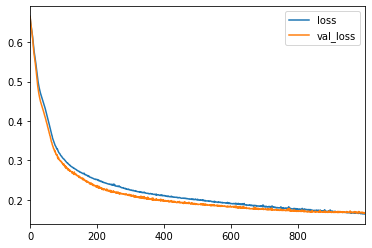

In [142]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [143]:
predictions = model.predict_classes(X_test)

In [144]:
predictions

array([[1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
    

In [145]:
from sklearn.metrics import classification_report,confusion_matrix

In [146]:
print(confusion_matrix(y_test,predictions))

[[339  10]
 [ 16 232]]


In [147]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       349
           1       0.96      0.94      0.95       248

    accuracy                           0.96       597
   macro avg       0.96      0.95      0.96       597
weighted avg       0.96      0.96      0.96       597



In [148]:
from tensorflow.keras.models import load_model

In [149]:
model.save('final_ANN_model1.h5')

In [159]:
new_data = df.drop('Cancer Positive',axis=1).iloc[1]

In [160]:
new_data

Age                    31.000000
BMI                    10.204207
BreastFeeding           1.000000
Marital Status          1.000000
Alcohol                 0.000000
Smoking                 0.000000
BreastCancerHistory     0.000000
Age at firstPeriod     12.000000
MenstrualCycle          1.000000
Name: 1, dtype: float64

In [161]:
new_data = scaler.transform(new_data.values.reshape(-1,9))

In [162]:
new_data

array([[0.28125   , 0.        , 1.        , 0.        , 0.        ,
        0.        , 0.        , 0.30769231, 1.        ]])

In [163]:
model.predict(new_data)

array([[0.00286826]], dtype=float32)

In [164]:
model.predict_classes(new_data)

array([[0]])

In [165]:
model.predict_proba(new_data)[0][0]*100

0.2868261653929949

In [166]:
later_model = load_model('final_ANN_model1.h5')

In [167]:
later_model.predict(new_data)

array([[0.00286826]], dtype=float32)